In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def author():
    return "bela"

def gtid():
    return 513

In [3]:
def get_spin_result(win_prob):
    result = False
    if np.random.random() <= win_prob:
        result = True
    return result

In [4]:
def test_code():
    win_prob = 0.60
    np.random.seed(gtid())
    print(get_spin_result(win_prob))

In [49]:
# 1 episode=1000 bets, episode bet & plot

def Winnings():
    episode_winnings = 0
    winnings = pd.DataFrame([0])
    winnings.columns=['a']
    count = 0

    while episode_winnings < 80:
        bet_amount = 1
        won = False
        while not won:
            won = get_spin_result(0.60)
            if won == True:
                episode_winnings = episode_winnings + bet_amount
            elif won == False:
                episode_winnings = episode_winnings - bet_amount
                bet_amount = bet_amount * 2
            count += 1
            if count <= 1000:
                winnings = winnings.append({'a':episode_winnings},ignore_index=True)
            
    while count < 1000:
        winnings = winnings.append({'a':episode_winnings},ignore_index=True)
        count += 1
        
    return winnings

In [41]:
# Figure 1

Experiment1 = pd.DataFrame()
for i in range(10):
    Experiment1 = pd.concat([Experiment1, Winnings()],axis=1)   
    
Experiment1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       1001 non-null   int64
 1   a       1001 non-null   int64
 2   a       1001 non-null   int64
 3   a       1001 non-null   int64
 4   a       1001 non-null   int64
 5   a       1001 non-null   int64
 6   a       1001 non-null   int64
 7   a       1001 non-null   int64
 8   a       1001 non-null   int64
 9   a       1001 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB


Text(0.5, 1.0, 'Experiment 1')

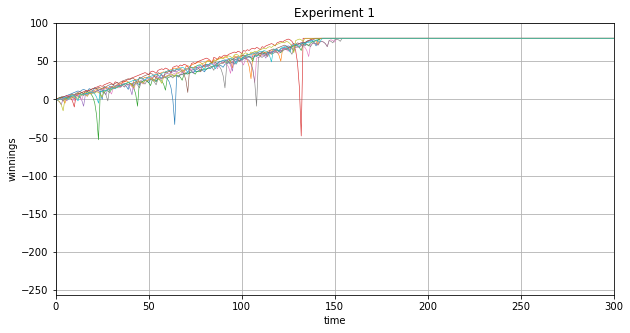

In [66]:
plt.figure(figsize=(10,5))
plt.plot(Experiment1,lw=0.6)
plt.xlim([0,300])
plt.ylim([-256,100])
plt.grid(True)
plt.xlabel('time')
plt.ylabel('winnings')
plt.title('Experiment 1')

In [115]:
Experiment1 = pd.DataFrame()
for i in range(10):
    Experiment1 = pd.concat([Experiment1, Winnings()],axis=1)   

In [116]:
# Figure 2

Ex1_mean = Experiment1.mean(axis=1)
Ex1_std = Experiment1.std(axis=1)
Ex1_meanplus = Ex1_mean + Ex1_std
Ex1_meanminus = Ex1_mean - Ex1_std

Text(0.5, 1.0, 'Mean of Each Round')

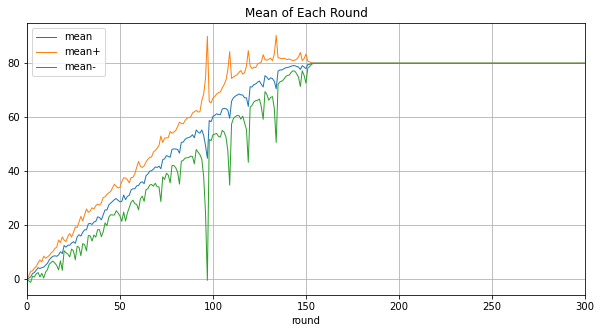

In [125]:
plt.figure(figsize = (10,5))
plt.plot(Ex1_mean,lw=1,label='mean')
plt.plot(Ex1_meanplus,lw=1,label='mean+')
plt.plot(Ex1_meanminus,lw=1,label='mean-')
plt.xlim([0,300])
plt.xlabel('round')
plt.grid(True)
plt.legend(loc=0)
plt.title('Mean of Each Round')

In [121]:
# Figure 3

Ex1_median = Experiment1.median(axis=1)
Ex1_std = Experiment1.std(axis=1)
Ex1_medianplus = Ex1_median + Ex1_std
Ex1_medianminus = Ex1_median - Ex1_std

Text(0.5, 1.0, 'Median of Each Round')

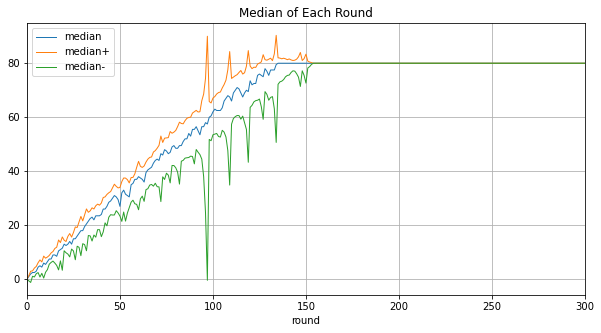

In [126]:
plt.figure(figsize = (10,5))
plt.plot(Ex1_median,lw=1,label='median')
plt.plot(Ex1_medianplus,lw=1,label='median+')
plt.plot(Ex1_medianminus,lw=1,label='median-')
plt.xlim([0,300])
plt.xlabel('round')
plt.grid(True)
plt.legend(loc=0)
plt.title('Median of Each Round')

In [142]:
# Experiment 2

def Real_Winnings():
    episode_winnings = 256
    winnings = pd.DataFrame([256])
    winnings.columns=['a']
    count = 0

    while 0 < episode_winnings < 336:
        bet_amount = 1
        won = False
        while not won:
            won = get_spin_result(0.60)
            if won == True:
                episode_winnings = episode_winnings + bet_amount
            elif won == False:
                episode_winnings = episode_winnings - bet_amount
                bet_amount = min(bet_amount * 2, episode_winnings) 
            count += 1
            if count <= 1000:
                winnings = winnings.append({'a':episode_winnings},ignore_index=True)
            
    while count < 1000:
        winnings = winnings.append({'a':episode_winnings},ignore_index=True)
        count += 1
        
    winnings = winnings - 256
        
    return winnings

,a
0,0
1,1
2,2
3,3
4,4
...,...
996,80
997,80
998,80
999,80


In [148]:
# Experiment 2

Experiment2 = pd.DataFrame()
for i in range(1000):
    Experiment2 = pd.concat([Experiment2,Real_Winnings()],axis=1)
    
Experiment2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       1001 non-null   int64
 1   a       1001 non-null   int64
 2   a       1001 non-null   int64
 3   a       1001 non-null   int64
 4   a       1001 non-null   int64
 5   a       1001 non-null   int64
 6   a       1001 non-null   int64
 7   a       1001 non-null   int64
 8   a       1001 non-null   int64
 9   a       1001 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB


In [149]:
# Figure 4

Ex2_mean = Experiment2.mean(axis=1)
Ex2_std = Experiment2.std(axis=1)
Ex2_meanplus= Ex2_mean + Ex2_std
Ex2_meanminus= Ex2_mean - Ex2_std

plt.plot(Ex2_mean,label='mean')
plt.plot(Ex2_meanplus,label='meanplus')
plt.plot(Ex2_meanminus,label='meanminus')
plt.legend(loc=0)
plt.xlim([0,300])
plt.grid(True)
plt.title('Mean')
plt.xlabel('round')

Text(0.5, 0, 'round')

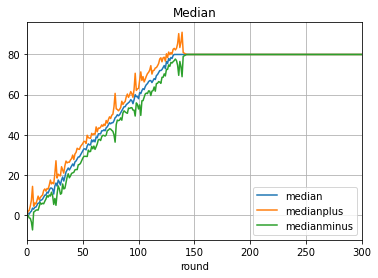

In [151]:
# Figure 5

Ex2_median = Experiment2.median(axis=1)
Ex2_std = Experiment2.std(axis=1)
Ex2_medianplus= Ex2_median + Ex2_std
Ex2_medianminus= Ex2_median - Ex2_std

plt.plot(Ex2_median,label='median')
plt.plot(Ex2_medianplus,label='medianplus')
plt.plot(Ex2_medianminus,label='medianminus')
plt.legend(loc=0)
plt.xlim([0,300])
plt.grid(True)
plt.title('Median')
plt.xlabel('round')

In [6]:
if __name__ == "__main__": 
    test_code()


True
